In [104]:
import csv
import random
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import timeit

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#import seaborn as sns
import matplotlib.pyplot as plt

# scoring
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [2]:
root_dir='RawData/AllBooks_baseline_DTM_Labelled.csv'

fullset = pd.read_csv(root_dir)

In [3]:
#split test train
train, test= train_test_split(fullset, test_size=0.30, random_state=42)

In [97]:
#build kmeans model
rangeOfKMeans = range(2, 12)
kmModel = [KMeans(n_clusters=i) for i in rangeOfKMeans]
kmedoidsModels = [KMedoids(n_clusters=i) for i in rangeOfKMeans]
hierarchyModels = [AgglomerativeClustering(n_clusters=i) for i in rangeOfKMeans]
#trainedKM = [kmModel[i].fit(train.iloc[: , 1:]) ]


In [118]:
trained,trainedMed,predsMed,trainedHie,predsHie  = [],[],[],[],[]
preds = []
for i in range(len(kmModel)):
    start = timeit.default_timer()
    trained.append(kmModel[i].fit(train.iloc[: , 1:]))
    preds.append(trained[i].predict(test.iloc[: , 1:]))
    stop = timeit.default_timer()
    #print(str(stop-start))
    
    start = timeit.default_timer()
    trainedMed.append(kmedoidsModels[i].fit(train.iloc[: , 1:]))
    predsMed.append(trainedMed[i].predict(test.iloc[: , 1:]))
    stop = timeit.default_timer()
    #print(str(stop-start))
    
    start = timeit.default_timer()
    trainedHie.append(hierarchyModels[i].fit(train.iloc[: , 1:]))
    predsHie.append(trainedHie[i].fit_predict(test.iloc[: , 1:]))
    stop = timeit.default_timer()
    print(str(stop-start))

0.480183699999543
0.4835447000004933
0.4825744999998278
0.4784988000010344
0.4760363999994297
0.47939600000063365
0.47980879999886383
0.47956169999997655
0.48771669999950973
0.4838001999996777


In [107]:
shs

{2: 0.3853526829632012,
 3: 0.3917832241073006,
 4: 0.3716568224580112,
 5: 0.3871095675754549,
 6: 0.38942455376121443,
 7: 0.3938185057129906,
 8: 0.3783270636919719,
 9: 0.38021701350705334,
 10: 0.38221845826486034,
 11: 0.3752669778568721}

In [75]:
corrrectLabels = []

for i in range(len(test.iloc[: , 0])):
    tmp = test.iloc[i , 0]
    tmp=tmp[0:int(tmp.find('_'))]
    corrrectLabels.append(tmp)
print("Number of unique books = " + str(len(set(corrrectLabels))))

Number of unique books = 8


In [119]:
set(corrrectLabels)

{'BookOfEccleasiasticus',
 'BookOfEcclesiastes',
 'BookOfProverb',
 'BookOfWisdom',
 'Buddhism',
 'TaoTeChing',
 'Upanishad',
 'YogaSutra'}

In [115]:
shs, db = {}, {}

for i in range(2,12):
    shs[i]=silhouette_score(test.iloc[:,1:], preds[i-2])
    db[i]=davies_bouldin_score(test.iloc[:,1:], preds[i-2])

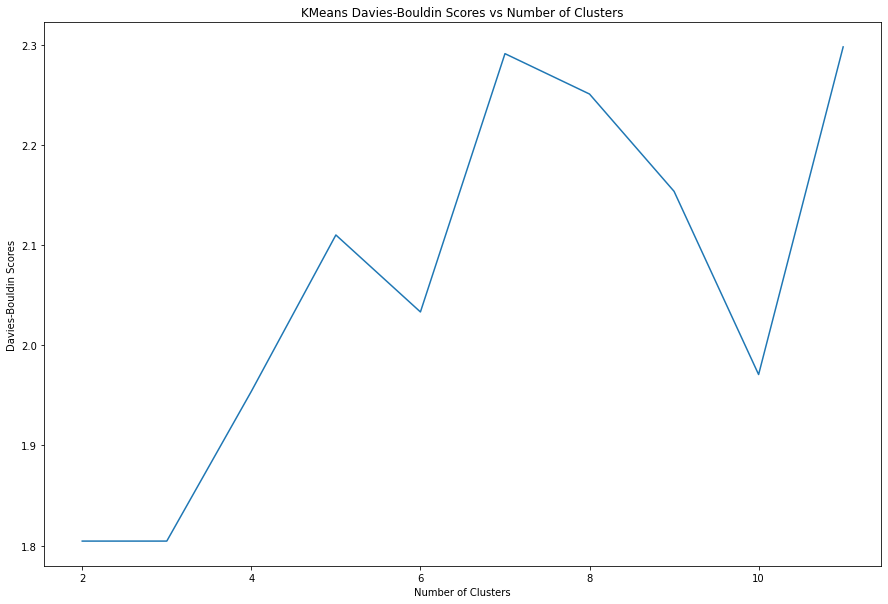

In [111]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Scores")
plt.title("KMeans Davies-Bouldin Scores vs Number of Clusters")
plt.show()

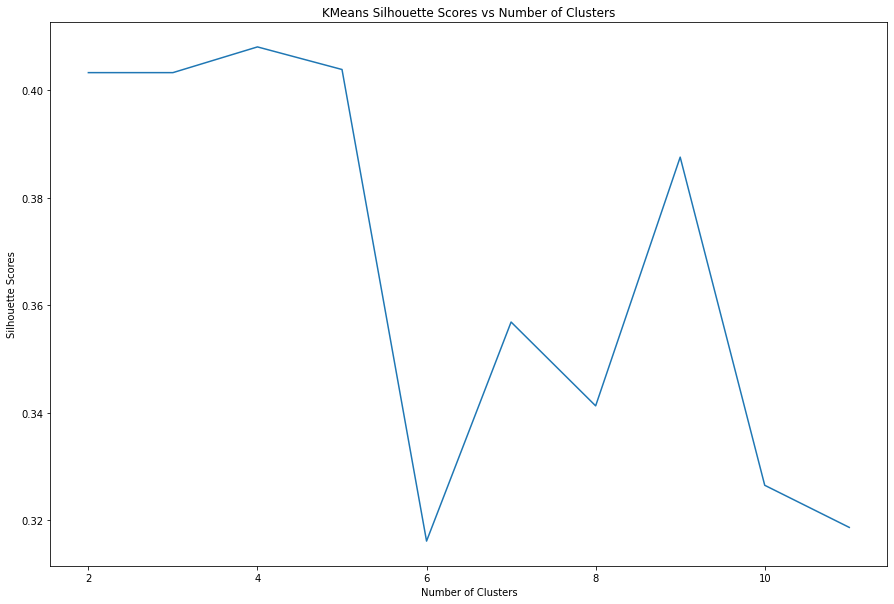

In [116]:
plt.figure(figsize=(15,10))
plt.plot(list(shs.keys()), list(shs.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")
plt.title("KMeans Silhouette Scores vs Number of Clusters")
plt.show()

In [120]:
shs, db = {}, {}

for i in range(2,12):
    shs[i]=silhouette_score(test.iloc[:,1:], predsMed[i-2])
    db[i]=davies_bouldin_score(test.iloc[:,1:], predsMed[i-2])

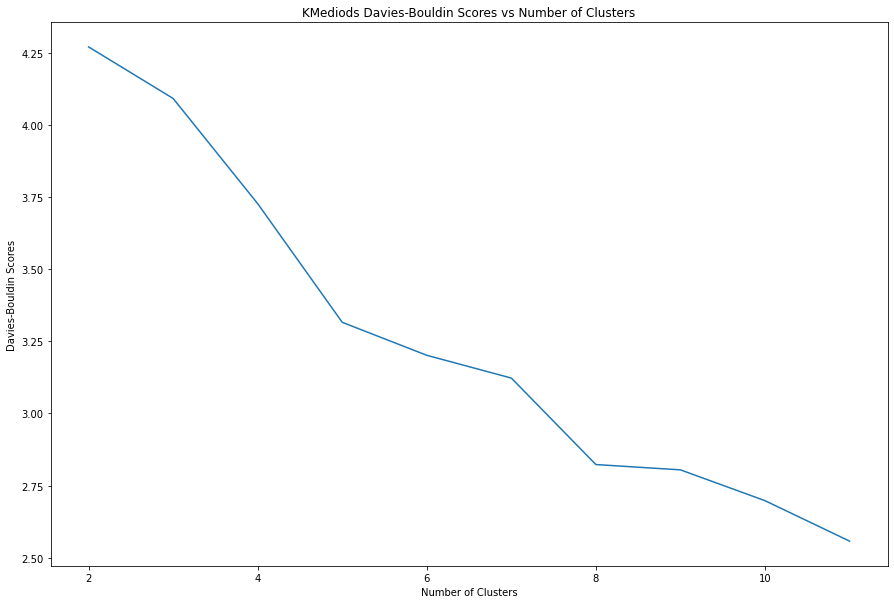

In [121]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Scores")
plt.title("KMediods Davies-Bouldin Scores vs Number of Clusters")
plt.show()

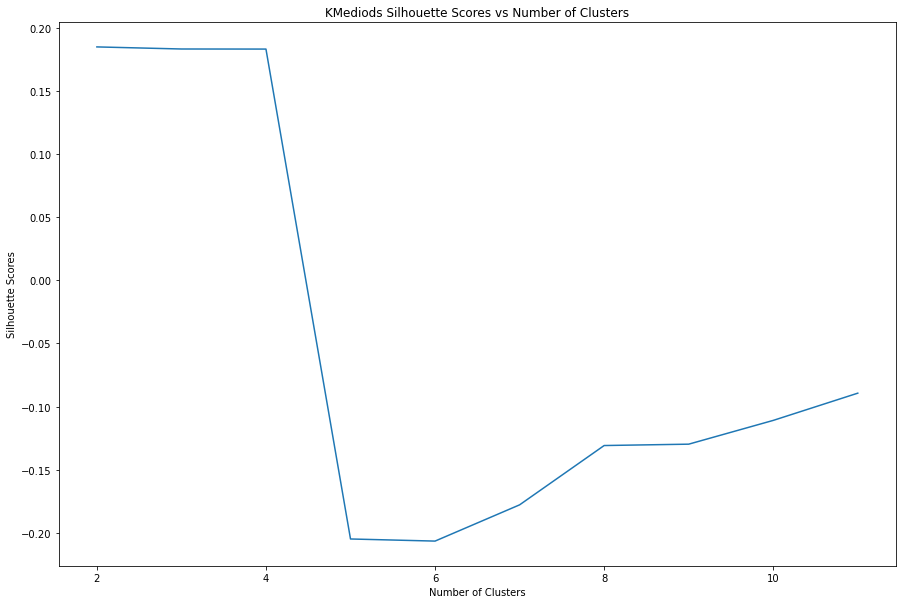

In [122]:
plt.figure(figsize=(15,10))
plt.plot(list(shs.keys()), list(shs.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")
plt.title("KMediods Silhouette Scores vs Number of Clusters")
plt.show()

In [100]:
shs, db = {}, {}

for i in range(2,12):
    shs[i]=silhouette_score(test.iloc[:,1:], predsHie[i-2])
    db[i]=davies_bouldin_score(test.iloc[:,1:], predsHie[i-2])

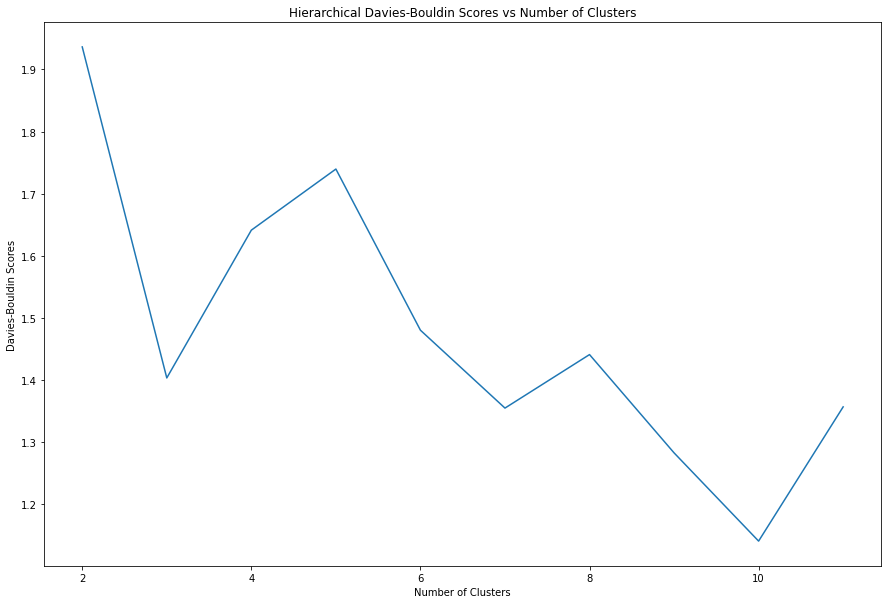

In [101]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Scores")
plt.title("Hierarchical Davies-Bouldin Scores vs Number of Clusters")
plt.show()

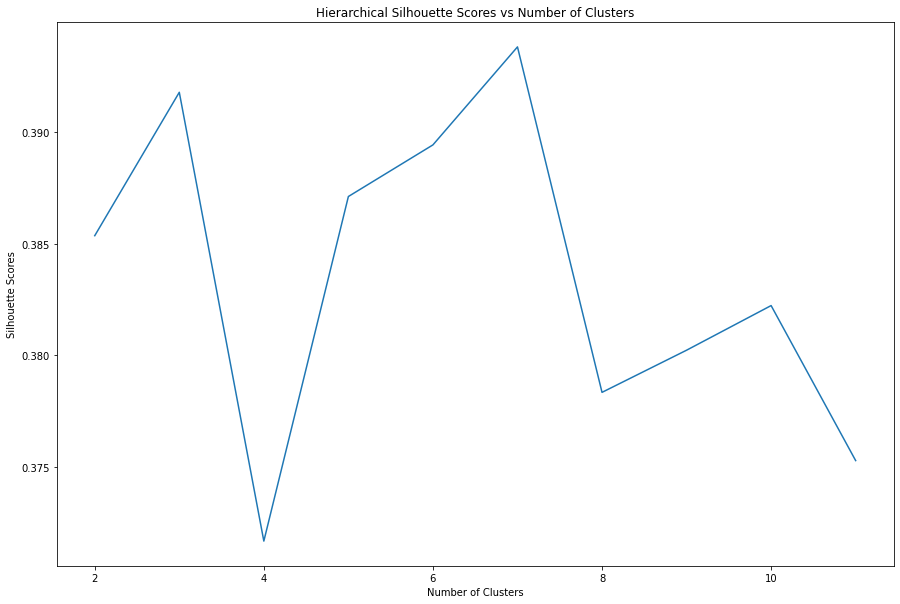

In [102]:
plt.figure(figsize=(15,10))
plt.plot(list(shs.keys()), list(shs.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")
plt.title("Hierarchical Silhouette Scores vs Number of Clusters")
plt.show()